##Q1: Translation of Image

In [21]:
from numpy import *
import sys
import math
import cv2
import matplotlib.pyplot as plt

In [3]:
#cv2.imread reads images in 3D coordinates(RGB format) so ('img',0) '0' reads values in 2D array
img1= cv2.imread("lena_translate.png",0) #to read images which are uploaded
img2= cv2.imread("pisa_rotate.png",0)
img3= cv2.imread("cells_scale.png",0)

In [4]:
tx=3.75
ty=4.3

In [5]:
width, height= img1.shape #finding the no' of pixels in x axis and y axis
print(width, height)

256 256


In [6]:
img1_t=zeros((width, height)) #creating zeros 2d array for target image which is of size of source image 

In [7]:
#adding zeros at four boundaries to the source the image and storing in other 2d array
img_padded = zeros((width+2, height+2))
img_padded[1:-1, 1:-1] = img1 #Assigning source intensity values from row,column 2 to row,column 257
print(img_padded)
width2, height2 = img_padded.shape
print(width2, height2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 162. 162. ... 171. 142.   0.]
 [  0. 162. 162. ... 171. 142.   0.]
 ...
 [  0.  45.  50. ... 102.  98.   0.]
 [  0.  44.  57. ... 102. 107.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
258 258



*   The zero rows and columns are padded at the beginning and ending because for the first and last rows in performing bilinear transformation there should be intensity values for 4 nearest neighbours.
*   The numbe of rows padded depends on n nearest neighbours interpolation.
*   Here we chose bilinear transformation so number of nearest neighbors are 4.






In [8]:
for xt in range(width):        #traversing along rows of target image
  for yt in range(height):     #traversing along columns of target image
    xs=xt-tx                   #we have xs:source coord'; xt:target coord'; xt=xs+tx ==> xs=xt-tx
    ys=yt-ty                   #we have ys:source coord'; yt:target coord'; yt=ys+ty ==> ys=yt-ty
    #intensity at source image =img1[xs,ys]
    x=xs+1                     #adding one because index number increased by adding a row at beginning of padded img
    y=ys+1                     #adding one because index number increased by adding a column at beginning of padded img
    xs1=math.floor(x)          #to get one of the nearest integer sourse x co-ord'
    ys1=math.floor(y)          #to get one of the nearest integer sourse y co-ord'
    a=x-xs1                    #distance to the landed x point from xs
    b=y-ys1                    #distance to the landed y point from ys

    #bilinear interpolation
    #assingning intensity to the target image by considering four nearest neighbors
    if xs1>=0 and xs1<=width and ys1>=0 and ys1<=height:
      img1_t[xt,yt]=(1-a)*(1-b)*img_padded[xs1,ys1]+(1-a)*b*img_padded[xs1,ys1+1]+a*(1-b)*img_padded[xs1+1,ys1]+a*b*img_padded[xs1+1,ys1+1]
    else:
      img1_t[xt,yt]=125        #assign 125 to the values where xs and ys dont exist.
    



[[125.    125.    125.    ... 125.    125.    125.   ]
 [125.    125.    125.    ... 125.    125.    125.   ]
 [125.    125.    125.    ... 125.    125.    125.   ]
 ...
 [125.    125.    125.    ...  58.375  58.35   57.275]
 [125.    125.    125.    ...  58.225  58.175  57.9  ]
 [125.    125.    125.    ...  55.7    59.375  57.7  ]]


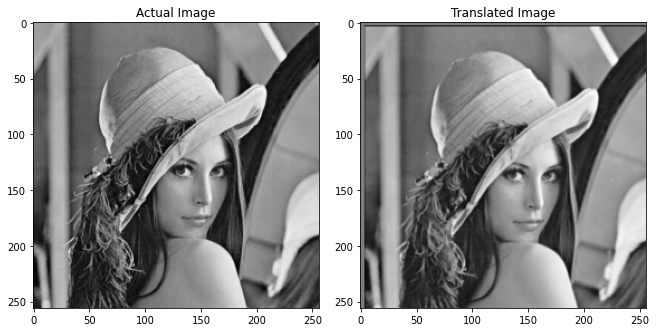

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img1,'gray')             #displaying gray scale image
ax1.title.set_text("Actual Image")  #setting title to the figure
ax2.imshow(img1_t,'gray')       
ax2.title.set_text("Translated Image")
print(img1_t)

##Q2: Rotation of image:

In [33]:
#let theta=10',5',4'
theta=-5                         #angle to be rotated
theta_r=pi*theta/180             #converting from degrees to radians

In [34]:
#theta_r
width2, height2= img2.shape       #size of the image2
print(width2, height2)

482 207


In [35]:
img_padded2 = zeros((width2+2, height2+2)) #padding zeros for bilinear interpolation
img_padded2[1:-1, 1:-1] = img2             #assigning source intensities to the padded 2d array 
img2_r=zeros((width2, height2))            #creating zeros 2d array for target image which is of size of source image 

In [ ]:
#img2_r

In [16]:
#theta_r

0.08726646259971647

In [36]:
for xt in range(width2):      #traversing along rows in the target image
  for yt in range(height2):   #traversing along columns in target image
      #width2/2 and height2/2 is the center of the given image
      # rotate about the center
      # To rotate around a point, we have to translate to that point

      # Then we apply rotation as we would apply rotation around the origin
      # And then translate back
      xs = cos(theta_r)*(xt-width2/2) - sin(theta_r)*(yt-height2/2) + width2/2
      ys = sin(theta_r)*(xt-width2/2) + cos(theta_r)*(yt-height2/2) + height2/2
      x=xs+1
      y=ys+1
      xs1=math.floor(x)
      ys1=math.floor(y)
      a=x-xs1
      b=y-ys1
      if xs1>=0 and xs1<=width2 and ys1>=0 and ys1<=height2:
        img2_r[xt,yt]=(1-a)*(1-b)*img_padded2[xs1,ys1]+(1-a)*b*img_padded2[xs1,ys1+1]+a*(1-b)*img_padded2[xs1+1,ys1]+a*b*img_padded2[xs1+1,ys1+1]
      else:
        img2_r[xt,yt]=125

      

[[125. 125. 125. ... 125. 125. 125.]
 [125. 125. 125. ... 125. 125. 125.]
 [125. 125. 125. ... 125. 125. 125.]
 ...
 [125. 125. 125. ... 125. 125. 125.]
 [125. 125. 125. ... 125. 125. 125.]
 [125. 125. 125. ... 125. 125. 125.]]


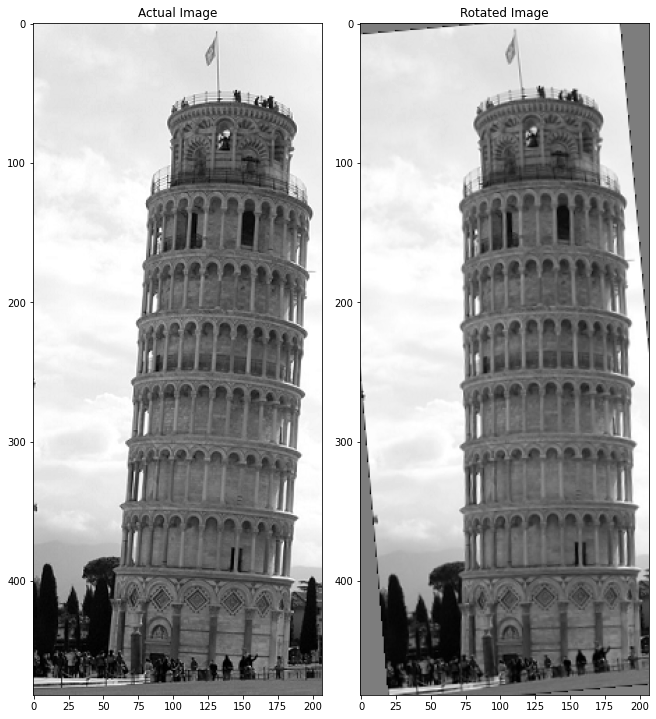

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img2,'gray')
ax1.title.set_text("Actual Image")
ax2.imshow(img2_r,'gray')
ax2.title.set_text("Rotated Image")
print(img2_r)

##Q3:Scaling of image

In [24]:
a1=0.8
#a=1.3

In [25]:
width3, height3= img3.shape
print(width3, height3)

240 315


In [26]:
img_padded3 = zeros((width3+2, height3+2))
img_padded3[1:-1, 1:-1] = img3
img3_s=zeros((width3, height3))

In [29]:
#print(img3_s)
a1

0.8

In [45]:
a1=1.3
xc=width3/2 #finding center
yc=height3/2
for xt in range(width3):
  for yt in range(height3):
    # We are scaling about the center
    # To scale around a point, we first translate to that point
    # Then we apply rotation as we would apply rotation around the origin
    # And then translate back
    xs = (xt-xc)/a1 + xc
    ys = (yt-yc)/a1 + yc 
    x=xs+1
    y=ys+1
    xs1=math.floor(x)
    ys1=math.floor(y)
    a=x-xs1
    b=y-ys1
    if xs1>=0 and xs1<=width3 and ys1>=0 and ys1<=height3:
      img3_s[xt,yt]=(1-a)*(1-b)*img_padded3[xs1,ys1]+(1-a)*b*img_padded3[xs1,ys1+1]+a*(1-b)*img_padded3[xs1+1,ys1]+a*b*img_padded3[xs1+1,ys1+1]
    else:
      img3_s[xt,yt]=255

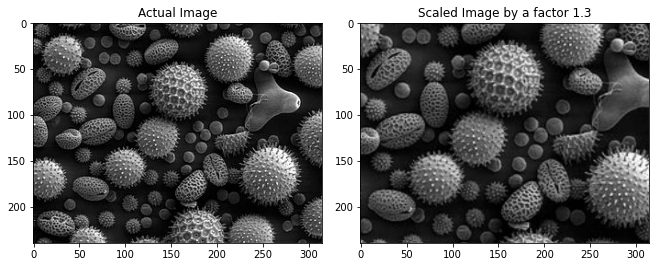

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img3,'gray')
ax1.title.set_text("Actual Image")
ax2.imshow(img3_s,'gray')
ax2.title.set_text("Scaled Image by a factor 1.3")